In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [4]:
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
dt = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
      'Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm']].dropna().reset_index().drop(columns=['index'])
dt.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0


In [7]:
dt.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
MinTemp,1.000000,0.730722,0.110986,0.196310,0.201961,0.174692,-0.452112,-0.462707,-0.245643,0.022310
MaxTemp,0.730722,1.000000,-0.070155,0.088774,0.031529,0.043346,-0.329208,-0.423019,-0.523531,-0.498399
Rainfall,0.110986,-0.070155,1.000000,0.132387,0.089173,0.062333,-0.169714,-0.129392,0.225787,0.256859
WindGustSpeed,0.196310,0.088774,0.132387,1.000000,0.601903,0.689313,-0.458755,-0.414750,-0.219663,-0.035175
WindSpeed9am,0.201961,0.031529,0.089173,0.601903,1.000000,0.513806,-0.230518,-0.179900,-0.269315,-0.029012
WindSpeed3pm,0.174692,0.043346,0.062333,0.689313,0.513806,1.000000,-0.300413,-0.261476,-0.132529,0.032667
Pressure9am,-0.452112,-0.329208,-0.169714,-0.458755,-0.230518,-0.300413,1.000000,0.961613,0.142009,-0.027871
Pressure3pm,-0.462707,-0.423019,-0.129392,-0.414750,-0.179900,-0.261476,0.961613,1.000000,0.189555,0.051186
Humidity9am,-0.245643,-0.523531,0.225787,-0.219663,-0.269315,-0.132529,0.142009,0.189555,1.000000,0.674924
Humidity3pm,0.022310,-0.498399,0.256859,-0.035175,-0.029012,0.032667,-0.027871,0.051186,0.674924,1.000000


<AxesSubplot:>

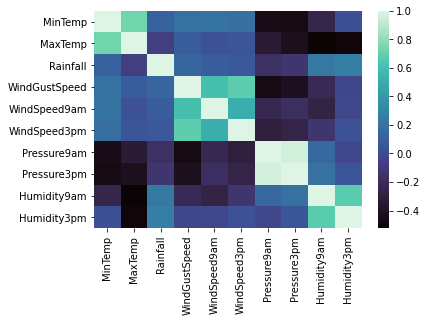

In [9]:
sns.heatmap(dt.corr(), cmap='mako')

In [10]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,120366.0,12.389435,6.363118,-8.2,7.8,12.1,17.0,33.9
MaxTemp,120366.0,23.483479,6.983335,2.6,18.1,22.9,28.5,48.1
Rainfall,120366.0,2.327709,8.473447,0.0,0.0,0.0,0.6,367.6
WindGustSpeed,120366.0,40.120840,13.487106,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,120366.0,14.376161,8.805772,0.0,7.0,13.0,20.0,87.0
WindSpeed3pm,120366.0,19.086727,8.678411,0.0,13.0,19.0,24.0,87.0
Pressure9am,120366.0,1017.654834,7.098417,980.5,1013.0,1017.6,1022.4,1041.0
Pressure3pm,120366.0,1015.253068,7.018884,977.1,1010.5,1015.2,1020.0,1039.6
Humidity9am,120366.0,68.298033,19.118671,0.0,56.0,69.0,82.0,100.0
Humidity3pm,120366.0,50.883539,20.690020,0.0,36.0,51.0,65.0,100.0


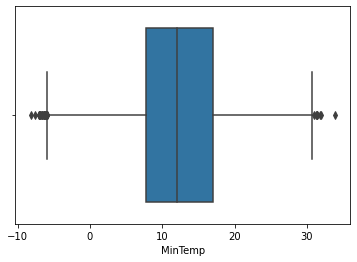

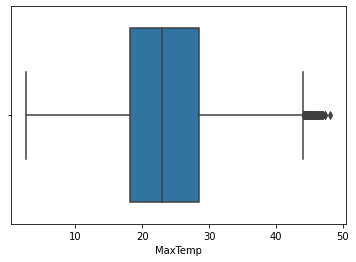

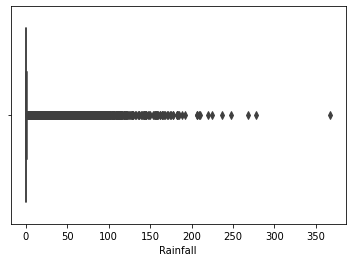

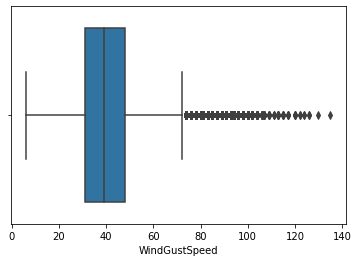

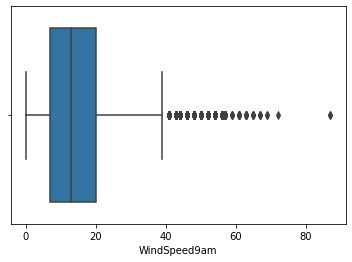

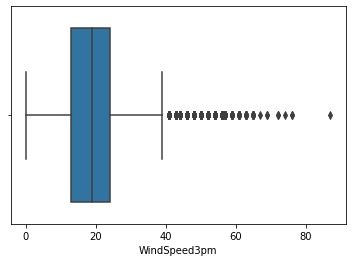

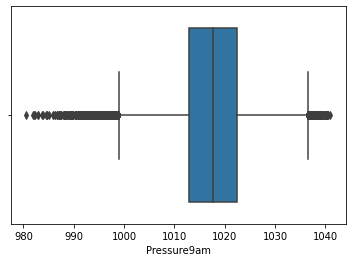

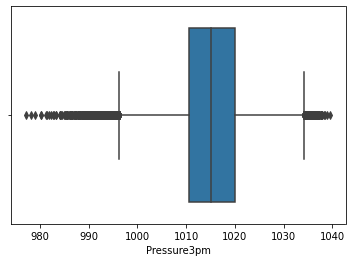

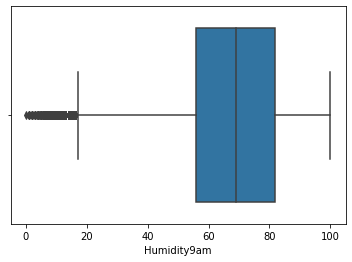

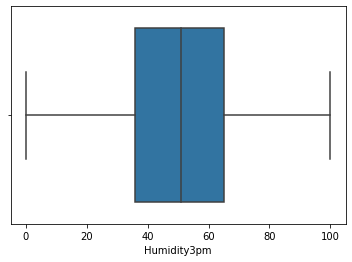

In [11]:
col = list(dt.describe())
for i in col:
    ax = plt.figure()
    ax = sns.boxplot(x=i, data=dt)

In [12]:
dt_dummy= pd.get_dummies(dt)
dt_dummy.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
X = dt_dummy.drop(['MaxTemp'], axis=1)
y = dt_dummy['MaxTemp']
X

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,Location_Adelaide,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,0.6,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,0.0,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,0.0,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,0.0,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,1.0,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120361,3.5,0.0,31.0,15.0,13.0,1024.7,1021.2,59.0,27.0,0,...,0,0,0,0,0,0,0,0,0,0
120362,2.8,0.0,31.0,13.0,11.0,1024.6,1020.3,51.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
120363,3.6,0.0,22.0,13.0,9.0,1023.5,1019.1,56.0,21.0,0,...,1,0,0,0,0,0,0,0,0,0
120364,5.4,0.0,37.0,9.0,9.0,1021.0,1016.8,53.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y

0         22.9
1         25.1
2         25.7
3         28.0
4         32.3
          ... 
120361    21.8
120362    23.4
120363    25.3
120364    26.9
120365    27.0
Name: MaxTemp, Length: 120366, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =46)

In [16]:
print (' Test ve Train veri setlerindeki gözlem sayıları...')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

 Test ve Train veri setlerindeki gözlem sayıları...
X_train:  (96292, 69)
y_train:  (96292,)
X_test:  (24074, 69)
y_test:  (24074,)


In [17]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     9152.
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:57:31   Log-Likelihood:            -2.2764e+05
No. Observations:               96292   AIC:                         4.554e+05
Df Residuals:                   96224   BIC:                         4.561e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        76.1733      1.530     49.779      0.000      73.174      79.173
MinTemp                       0.8228      0.002    415.902      0.000       0.819       0.827
Rainfall                      0.0036      0.001      3.404      0.001       0.002       0.006
WindGustSpeed                 0.0003      0.001      0.299      0.765      -0.002       0.002
WindSpeed9am                 -0.0994      0.001    -74.328      0.000      -0.102      -0.097
WindSpeed3pm                 -0.0087      0.001     -6.059      0.000      -0.011      -0.006
Pressure9am                   0.4786      0.005     90.127      0.000       0.468       0.489
Pressure3pm                  -0.5372      0.005   -102.163      0.000      -0.547      -0.527
Humidity9am                  -0.0336      0.001    -46.787      0.000      -0.035      -0.032
Humidity3pm                  -0.1399      0.001   -212.379      0.000      -0.141      -0.139
Location_Adelaide            -0.2627      0.064     -4.090      0.000      -0.389      -0.137
Location_Albury               2.3114      0.062     37.236      0.000       2.190       2.433
Location_AliceSprings         1.2519      0.063     19.764      0.000       1.128       1.376
Location_BadgerysCreek        2.8118      0.065     43.406      0.000       2.685       2.939
Location_Ballarat             3.2478      0.063     51.178      0.000       3.123       3.372
Location_Bendigo              2.4281      0.062     39.289      0.000       2.307       2.549
Location_Brisbane             0.3528      0.064      5.498      0.000       0.227       0.479
Location_Cairns               1.5116      0.066     22.954      0.000       1.383       1.641
Location_Canberra             2.6643      0.063     42.349      0.000       2.541       2.788
Location_Cobar                0.4618      0.065      7.127      0.000       0.335       0.589
Location_CoffsHarbour         2.1020      0.069     30.586      0.000       1.967       2.237
Location_Dartmoor             3.5556      0.064     55.320      0.000       3.430       3.682
Location_Darwin               1.0111      0.065     15.476      0.000       0.883       1.139
Location_GoldCoast            1.7738      0.068     26.080      0.000       1.640       1.907
Location_Hobart              -0.5547      0.061     -9.114      0.000      -0.674      -0.435
Location_Katherine            3.3683      0.113     29.913      0.000       3.148       3.589
Location_Launceston           1.6807      0.074     22.729      0.000       1.536       1.826
Location_Melbourne            0.2809      0.069      4.082      0.000       0.146       0.416
Location_MelbourneAirport     1.7648      0.065     27.323      0.000       1.638       1.891
Location_Mildura              2.0597      0.063     32.920      0.000      

In [18]:
X = dt_dummy.drop(['MaxTemp'], axis=1)
y = dt_dummy['MaxTemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
model = LinearRegression().fit(X_train, y_train)

In [19]:
print('train r2',model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('-'*40)

print('test r2',model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('-'*40)

print('r2 crossvalid',cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8643181705132139
train rmse 2.5727901701240277
----------------------------------------
test r2 0.8639331364463056
test rmse 2.5739919740121397
----------------------------------------
r2 crossvalid 0.8640809276157635
mean squaroot error-crossvalid 2.575553762781612


In [20]:
ridge_model=Ridge()
ridge_model.fit(X_train, y_train)
# y_pred=ridge_model.predict(X_test)
# y_pred_train=ridge_model.predict(X_train)
alpha_space = np.linspace(5,0.01,50)
Ridge(alpha_space)
alphaCV = RidgeCV(alphas = alpha_space, 
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [21]:
alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([5.        , 4.89816327, 4.79632653, 4.6944898 , 4.59265306,
       4.49081633, 4.38897959, 4.28714286, 4.18530612, 4.08346939,
       3.98163265, 3.87979592, 3.77795918, 3.67612245, 3.57428571,
       3.47244898, 3.37061224, 3.26877551, 3.16693878, 3.06510204,
       2.96326531, 2.86142857, 2.75959184, 2.6577551 , 2.55591837,
       2.45408163, 2.3522449 , 2.25040816, 2.14857143, 2.04673469,
       1.94489796, 1.84306122, 1.74122449, 1.63938776, 1.53755102,
       1.43571429, 1.33387755, 1.23204082, 1.13020408, 1.02836735,
       0.92653061, 0.82469388, 0.72285714, 0.62102041, 0.51918367,
       0.41734694, 0.3155102 , 0.21367347, 0.11183673, 0.01      ]),
        normalize=True, scoring='neg_mean_squared_error')

In [22]:
alphaCV.alpha_

0.01

In [23]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001, normalize=True)

In [24]:
print('train r2',ridge_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))))
print('-'*40)

print('test r2',ridge_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))
print('-'*40)

print('r2 crossvalid',cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=ridge_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8642975714920882
train rmse 2.5729854613724545
----------------------------------------
test r2 0.8638760839709498
test rmse 2.5745315514644544
----------------------------------------
r2 crossvalid 0.8640603165915692
mean squaroot error-crossvalid 2.5757480916865743


In [25]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
alpha_space = np.linspace(0.01, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)
lasso_cv_model.alpha_

0.01

In [26]:
lasso_model = Lasso(0.01).fit(X_train, y_train)

In [27]:
print('train r2',lasso_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train))))
print('-'*40)

print('test r2',lasso_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test))))
print('-'*40)

print('r2 crossvalid',cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=lasso_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8604112256676085
train rmse 2.609568908174717
----------------------------------------
test r2 0.8604015313059827
test rmse 2.6071818766185695
----------------------------------------
r2 crossvalid 0.8602407428905317
mean squaroot error-crossvalid 2.6098359714584767


In [28]:
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=0.5)
elastic_model.fit(X_train,y_train)
elastic_model.l1_ratio_

0.5

In [29]:
elastic_model.alpha_

0.01

In [30]:
print('train r2',elastic_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, elastic_model.predict(X_train))))
print('-'*40)

print('test r2',elastic_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, elastic_model.predict(X_test))))
print('-'*40)

print('r2 crossvalid',cross_val_score(elastic_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=elastic_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8613438358619245
train rmse 2.6008368693834636
----------------------------------------
test r2 0.8614082102067673
test rmse 2.5977643529230803
----------------------------------------
r2 crossvalid 0.8611734109467107
mean squaroot error-crossvalid 2.6009748090282043


In [ ]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
pol_model = LinearRegression()
pol_model.fit(X_poly_train,y_train)
y_pred=pol_model.predict(X_poly_test)
y_pred_train=pol_model.predict(X_poly_train)

In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
poly_model.score(X_train, y_train)
X_test = poly.fit_transform(X_test)
poly_model.score(X_test, y_test)
poly_model.score(X_train, y_train)
np.sqrt(mean_squared_error(y_train,poly_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test,poly_model.predict(X_test)))
cross_val_score(poly_model, X_train, y_train, cv = 10, scoring = 'r2').mean()

In [ ]:
print('train r2',pol_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, pol_model.predict(X_train))))
print('-'*40)

print('test r2',pol_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, pol_model.predict(X_test))))
print('-'*40)

print('r2 crossvalid',cross_val_score(pol_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=pol_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())